In [1]:
# library file import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Importing the csv file in python environment
comcast = pd.read_csv(r'C:\Users\hp\Downloads\Compressed\Comcast_telecom_complaints_data.csv')

In [3]:
# checking the file contains
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
# Checking the decribtion of all columns
comcast.describe(include= 'all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,371339,Comcast,24-06-15,24-Jun-15,5:32:37 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [5]:
# checking if there any NULL values present in dataset or not
comcast[comcast.isnull()].count()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [6]:
# Checcking the entire info
comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [7]:
# Changing the String data to Datetime and Extrating the Month and day from it
comcast['Date_month_year'] = pd.to_datetime(comcast['Date_month_year'])
comcast['Month'] =  comcast['Date_month_year'].apply(lambda x: x.month)
comcast['Day'] = comcast['Date_month_year'].apply(lambda x: x.day)

In [8]:
comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26


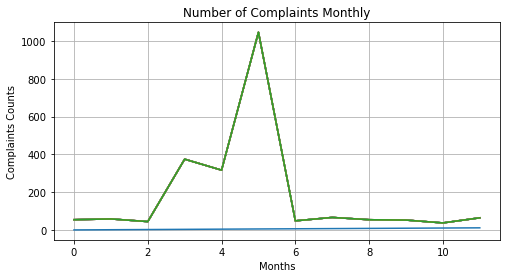

In [9]:
#number of complaints monthly
plt.figure(figsize=(8,4))
bymonth = comcast.groupby('Month').count().reset_index()
plt.title("Number of Complaints Monthly")
plt.xlabel('Months')
plt.ylabel('Complaints Counts')
plt.grid(True)
plt.plot(bymonth)
plt.show()

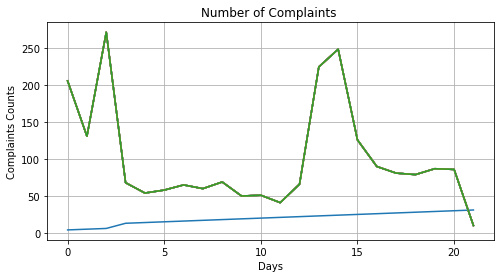

In [10]:
#number of complaints daily
plt.figure(figsize=(8,4))
bymonth = comcast.groupby('Day').count().reset_index()
plt.title("Number of Complaints ")
plt.xlabel('Days')
plt.ylabel('Complaints Counts')
plt.grid(True)
plt.plot(bymonth)
plt.show()

In [11]:
#creating a type of Custumer Complaints
comcast['Customer Complaint'] = comcast['Customer Complaint'].str.title()
complaint_type = comcast['Customer Complaint'].value_counts()
complaint_type

Comcast                                       102
Comcast Data Cap                               30
Comcast Internet                               29
Comcast Data Caps                              21
Comcast Billing                                18
                                             ... 
Service Complaint                               1
Speed Issues                                    1
Comcast Internet, Telephone, Tv Service         1
Comcast Connection Issues                       1
Billing And Deceitful Practices By Comcast      1
Name: Customer Complaint, Length: 1740, dtype: int64

In [12]:
#import Nltk for Data Extration from sentencs
import nltk
%pip install wordCloud

Note: you may need to restart the kernel to use updated packages.


In [13]:
# creating a stropwords list
from wordcloud import WordCloud, STOPWORDS
common_complaints = comcast['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops:
    STOPWORDS.add(word)

In [14]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

In [15]:
# Removing The Punctuation from the Sentence
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
# Data Cleaning Processs
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [18]:
# Creating a List after Data cleaning Process
doc_complete = comcast['Customer Complaint'].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]

In [19]:
# Importing Gensim for Model Building
%pip install gensim
from gensim import corpora

Note: you may need to restart the kernel to use updated packages.


C:\Users\hp\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [20]:
dictionary = corpora.Dictionary(doc_clean)
dictionary

In [21]:
# Creating  A matrix for words in Numerical form
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [22]:
from gensim.models import LdaModel

In [23]:
num_topic = 9
ldamodel = LdaModel(doc_term_matrix,num_topics=num_topic,id2word = dictionary,passes=10)

In [24]:
# Topics of Matrix of words
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.053*"false" + 0.052*"service" + 0.042*"deceptive" + 0.040*"comcastxfinity" + 0.025*"day" + 0.025*"advertising" + 0.023*"misleading" + 0.023*"sale" + 0.020*"switch" + 0.019*"shitty"')

(1, '0.123*"speed" + 0.114*"internet" + 0.105*"comcast" + 0.052*"charge" + 0.036*"throttling" + 0.025*"price" + 0.017*"paying" + 0.015*"contract" + 0.014*"slow" + 0.014*"high"')

(2, '0.058*"comcast" + 0.039*"credit" + 0.028*"email" + 0.027*"said" + 0.026*"bill" + 0.026*"option" + 0.025*"people" + 0.023*"throttled" + 0.023*"lied" + 0.022*"one"')

(3, '0.218*"billing" + 0.163*"comcast" + 0.085*"issue" + 0.057*"practice" + 0.038*"unfair" + 0.018*"fraudulent" + 0.018*"monopolistic" + 0.017*"show" + 0.013*"appointment" + 0.012*"refund"')

(4, '0.281*"internet" + 0.112*"service" + 0.102*"comcast" + 0.026*"slow" + 0.026*"connection" + 0.017*"outage" + 0.016*"lack" + 0.013*"intermittent" + 0.012*"unreliable" + 0.011*"signal"')

(5, '0.188*"service" + 0.129*"comcast" + 0.052*"customer" + 0.039*"xfinity" + 

In [25]:
# Creating a dataFrame  For Docx Matrix in String Values
word_dict = {}
for i in range(num_topic):
    words = ldamodel.show_topic(i,topn = 20)
    word_dict['Topic '+"{}".format(i)]=[i[0] for i in words]

In [26]:
pd.DataFrame(word_dict)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
0,false,speed,comcast,billing,internet,service,fee,comcast,service
1,service,internet,credit,comcast,service,comcast,without,data,comcast
2,deceptive,comcast,email,issue,comcast,customer,charged,cap,bill
3,comcastxfinity,charge,said,practice,slow,xfinity,comcast,complaint,cable
4,day,throttling,bill,unfair,connection,poor,month,usage,problem
5,advertising,price,option,fraudulent,outage,pricing,installation,limit,back
6,misleading,paying,people,monopolistic,lack,complaint,day,charge,contract
7,sale,contract,throttled,show,intermittent,cramming,several,xfinity,monthly
8,switch,slow,lied,appointment,unreliable,unfair,year,bandwidth,get
9,shitty,high,one,refund,signal,terrible,connectivity,broadband,phone


In [27]:
# Chechking the Status Types
comcast['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [28]:
# create a new Variable Categorical for open and closed type datas
comcast['Categorical'] = [ 'OPEN' if Status == 'Open' or Status == 'Pending' else 'CLOSED' for Status in comcast['Status']]

In [29]:
# Creating a Variable to Give us overview which State has Closed or Open Status and how many
comcast['State'] = comcast['State'].str.title() 
Type_Count = comcast.groupby(['State','Categorical']).size().unstack().fillna(0)

In [30]:
Type_Count

Categorical,CLOSED,OPEN
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


<AxesSubplot:xlabel='State'>

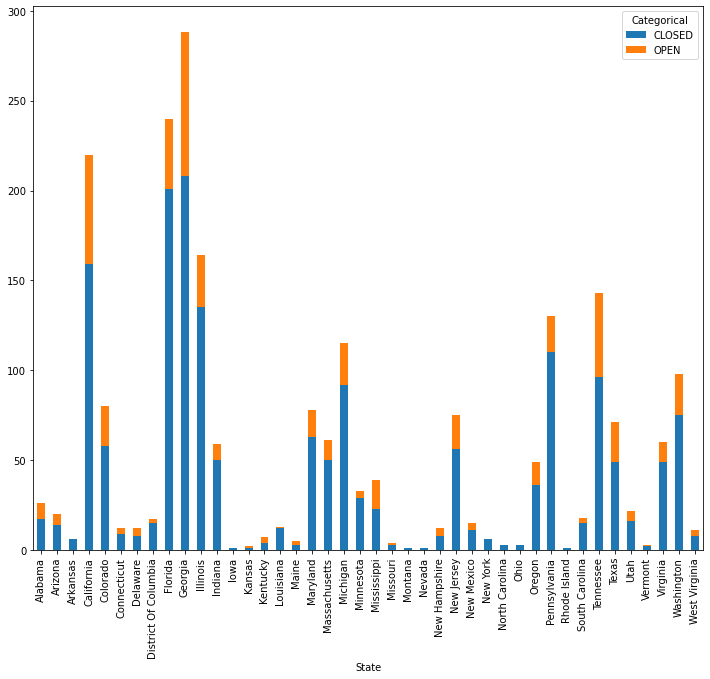

In [31]:
#Visulation of State with Categorical
Type_Count.plot(kind="bar", figsize=(12,10), stacked=True)

In [32]:
# Chechking which State has Maximum Complaints
Max_Complain = comcast.groupby(["State","Categorical"]).size().unstack().fillna(0)
Max_Complain.sort_values('CLOSED',axis = 0,ascending=False)[:1]

Categorical,CLOSED,OPEN
State,,
Georgia,208.0,80.0


In [33]:
#Chechking Georgia Has how many Resolved and Unresolved Complaints
Max_Complain['Resolved'] = Max_Complain['CLOSED']/Max_Complain['CLOSED'].sum()*100
Max_Complain['Unresolved'] = Max_Complain['OPEN']/Max_Complain['OPEN'].sum()*100

In [34]:
Max_Complain.sort_values('Unresolved', axis=0,ascending=False)[:1]

Categorical,CLOSED,OPEN,Resolved,Unresolved
State,,,,
Georgia,208.0,80.0,12.18512,15.473888


In [35]:
#Creating a ratio of Entire Dataset How many Unresolve or Resolved Cases are There
C_P= comcast.groupby(['Received Via','Categorical']).size().unstack().fillna(0)
C_P['Resolved'] = C_P['CLOSED']/C_P['CLOSED'].sum()*100
C_P['Resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: Resolved, dtype: float64

([<matplotlib.patches.Wedge at 0x1f6452d0880>,
 [Text(-0.021255489977842313, 1.0997946190747625, 'CLOSED'),
  Text(0.02125538700763901, -1.0997946210648402, 'OPEN')])

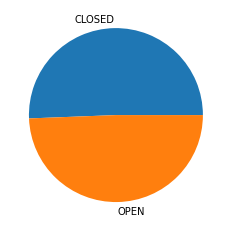

In [36]:
# Visulazition The Ratio
plt.pie(C_P['Resolved'],labels=C_P)